In [48]:

#Building a predictive loan prediction model based on the customer profile using  machine learning algorithm .

# 1.Sample description about the datast.
             # LoanAmount : Loan amount in thousands of dollars
            # Loan_Amount_Term : Term of loan in months
            # Credit_History : Credit history meets guidelines yes or no
            # Property_Area : Urban/ Semi Urban/ Rural
           # Loan_Status : Loan approved (Y/N) this is the target variable

#Activities:
#Task 1: Data Preprocessing
#Task 2: Handling missing values with the mode of column value if the percentage of null value is greater than 5 % else drop it.
#Task 3: Encoding: Handling Catagroical Columns.
#Task 4: Feature scaling  using Standardization
#Task 5: Apply oversampling for balancing dependant variables.
#Task 6: Split both train and test data 
#Task 7: K-fold cross validation for improving the performance of our model for unseen data
#Task 8: Model Building  using logistic regression,SVM,Decision tree classifier and random forest clasffication algorithm
#task 9: Hyperparameter tuning 
#task 10: Evaluation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
pd.options.mode.chained_assignment = None # To omit default='warnings'

In [2]:
#reading the data and checking of the first row of data
loan=pd.read_csv('loan_data.csv')
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#Checking of null values in percentage
loan.isnull().sum()*100/loan.shape[0]

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [4]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
#Selection of columns with having <5% of null values
column=['Gender', 'Married', 'Dependents','LoanAmount','Loan_Amount_Term']

In [7]:
#Droping null values
loan.dropna(subset=column,inplace=True)

In [8]:
loan['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

In [9]:
#Taking the mode value for columns with having >5% of null values
loan['Self_Employed']=loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0])
loan['Credit_History']=loan['Credit_History'].fillna(loan['Credit_History'].mode()[0])  

In [10]:
#Checking of null values after cleaning
loan.isnull().sum()*100/loan.shape[0]

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [11]:
#checking of duplicate records
loan.duplicated().any()
#It returns false value so that the data set has no duplicate values

False

In [12]:
#Total instance of data after pre-processing 
loan.shape

(553, 13)

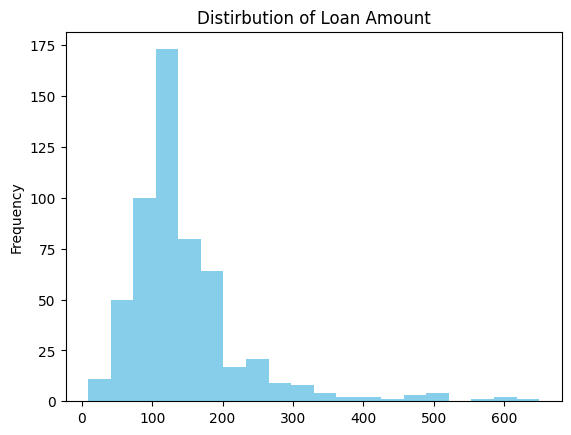

In [31]:
#Checking the distirbution of data for some features 
loan['LoanAmount'].plot(kind='hist',bins=20,color='skyblue',title="Distirbution of Loan Amount")
plt.show()

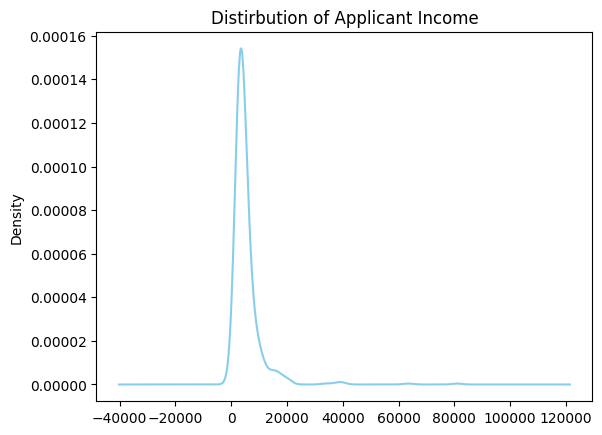

In [29]:
loan['ApplicantIncome'].plot(kind='kde',color='skyblue',title="Distirbution of Applicant Income")
plt.show()
#Its clear that many loan applicant customer has an income of less than 20000$

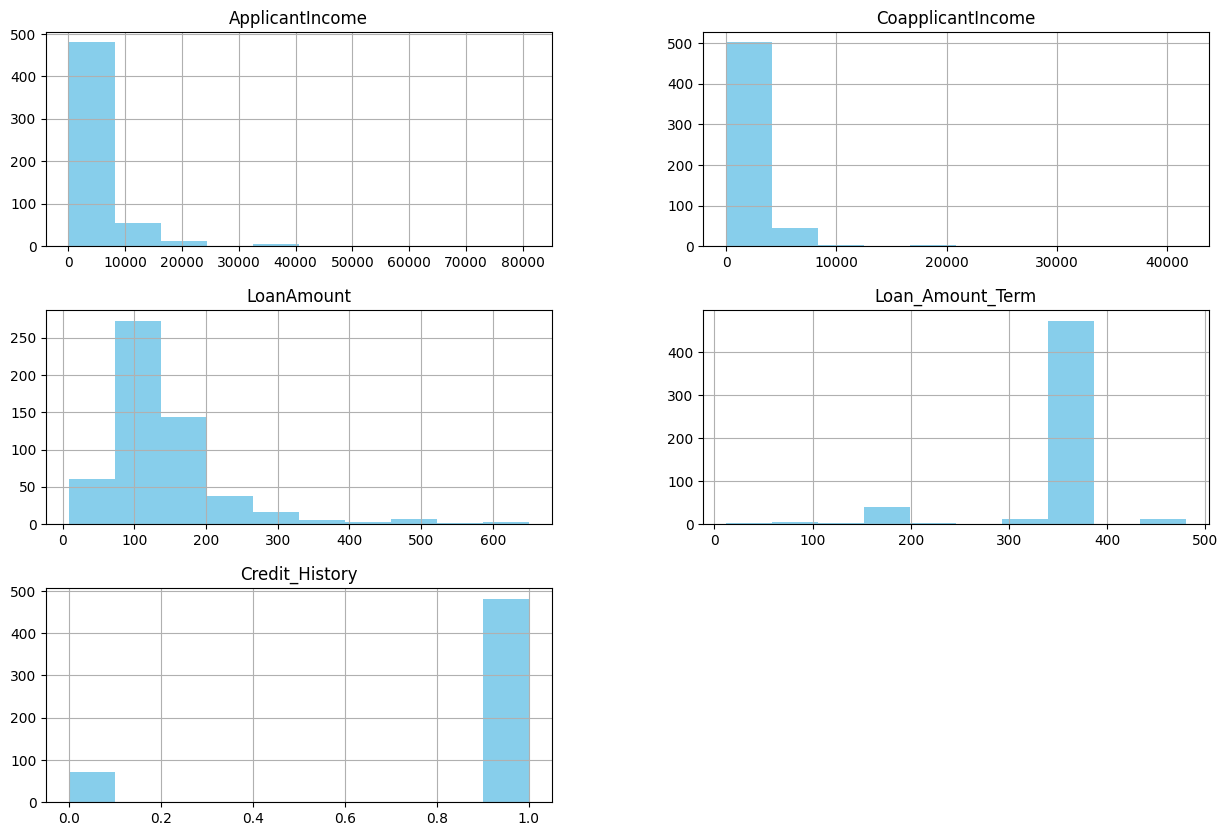

In [40]:
#Visualizing the distribution for all columns
loan.hist(figsize=(15,10),color='skyblue')
plt.show()


2. Handling Catagorical columns

In [13]:
#Removing unwanted column
loan.drop('Loan_ID',axis=1,inplace=True)

In [14]:
loan.sample(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
404,Female,No,0,Graduate,Yes,7441,0.0,194.0,360.0,1.0,Rural,N
269,Female,No,1,Graduate,No,2876,1560.0,90.0,360.0,1.0,Urban,Y
411,Male,Yes,0,Graduate,No,6256,0.0,160.0,360.0,1.0,Urban,Y


In [15]:
#Replacing '3+' by '4'
loan['Dependents']=loan['Dependents'].apply(lambda x:'4'if x=='3+' else x)

In [16]:
loan['Dependents'].unique()

array(['1', '0', '2', '4'], dtype=object)

In [17]:
loan.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [18]:
#Getting dummies values for catagorical data to get dummies numerical value
loan['Gender']=loan['Gender'].astype('category').cat.codes
loan['Married']=loan['Married'].astype('category').cat.codes
loan['Education']=loan['Education'].astype('category').cat.codes
loan['Self_Employed']=loan['Self_Employed'].astype('category').cat.codes
loan['Property_Area']=loan['Property_Area'].astype('category').cat.codes
loan['Loan_Status']=loan['Loan_Status'].astype('category').cat.codes

In [19]:
#Thew new data after getting dummies value
loan.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1


In [20]:
#Oversampling — Duplicating samples from the minority class
#Balancing the data based on target variable 
loan['Loan_Status'].value_counts()

1    389
0    164
Name: Loan_Status, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


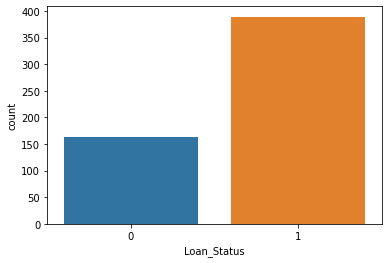

In [21]:
sn.countplot(loan['Loan_Status'])
plt.show()

In [22]:
#Store feature matrix in X and target in vector y
X=loan.drop('Loan_Status',axis=1)
Y=loan['Loan_Status']

In [23]:
# instantiating the random over sampler 
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler()
# resampling X, y
X_resampling, Y_resampling = ros.fit_resample(X, Y)

In [24]:
X=X_resampling
Y=Y_resampling
print(Counter(Y))

Counter({0: 389, 1: 389})


3. Feature Scaling(Standardization)

In [25]:
#Columns to be standardaized 
cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']


In [26]:
#Scaling using Standrdization
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
X[cols]=st.fit_transform(X[cols])

In [27]:
#Standardized result
X.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,1,0,0,-0.137708,-0.072302,-0.231354,0.274535,1.0,0
1,1,1,0,0,1,-0.371603,-0.492544,-0.965103,0.274535,1.0,2
2,1,1,0,1,0,-0.433217,0.164573,-0.326031,0.274535,1.0,2
3,1,0,0,0,0,0.071661,-0.492544,-0.077503,0.274535,1.0,2
4,1,1,2,0,1,-0.014480,0.676778,1.413664,0.274535,1.0,2


4. Split the dataset into traning and test  and apply K-fold cross validation


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

In [29]:
model_df={}
def model_val(model,X,Y):
  X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
  model.fit(X_train,Y_train)
  Y_pred=model.predict(X_test)
  print(f'{model} accuracy is {accuracy_score(Y_test,Y_pred)}')
  
  score=cross_val_score(model,X,Y,cv=5)
  print(f'{model} average cross val is {np.mean(score)}')
  model_df[model]=round(np.mean(score)*100,2)


In [30]:
#Using LogisticRegression
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model_val(model1,X,Y)

LogisticRegression() accuracy is 0.7051282051282052
LogisticRegression() average cross val is 0.705616211745244


In [31]:
model_df

{LogisticRegression(): 70.56}

In [32]:
#Using SVC
from sklearn import svm
model2=svm.SVC()
model_val(model2,X,Y)

SVC() accuracy is 0.717948717948718
SVC() average cross val is 0.7262200165425974


In [33]:
#Using Decesion Tree classifier
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier()
model_val(model3,X,Y)

DecisionTreeClassifier() accuracy is 0.8782051282051282
DecisionTreeClassifier() average cross val is 0.852183622828784


In [34]:
#using RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
model4=RandomForestClassifier()
model_val(model4,X,Y)

RandomForestClassifier() accuracy is 0.8846153846153846
RandomForestClassifier() average cross val is 0.907460711331679


In [35]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
model4.fit(X_train,Y_train)
Y_pred=model4.predict(X_test)
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        76
           1       0.89      0.89      0.89        80

    accuracy                           0.88       156
   macro avg       0.88      0.88      0.88       156
weighted avg       0.88      0.88      0.88       156



In [36]:
model_df
# Hence RandomForestClassifier  is the best classfication algorithm for this dataset 

{LogisticRegression(): 70.56,
 SVC(): 72.62,
 DecisionTreeClassifier(): 85.22,
 RandomForestClassifier(): 90.75}

 5.Hyperparameter tuning 

In [37]:
#Obtaining optimal model by changing parameters 
#Using randomized search CV

In [66]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               }
random_grid

{'n_estimators': [100, 144, 188, 233, 277, 322, 366, 411, 455, 500],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]}

In [67]:
# Use the random grid to search for best hyperparameters
from sklearn.ensemble import RandomForestClassifier
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,n_iter = 200,cv = 5,random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [100, 144, 188, 233,
                                                         277, 322, 366, 411,
                                                         455, 500]},
                   random_state=42)

In [68]:
#Evalutaing the model
# Selecting the optimal model
best_random = rf_random.best_estimator_

In [69]:
Y_pred2=best_random.predict(X_test)
accuracy_score(Y_test,Y_pred2)

0.8782051282051282

In [70]:
print(classification_report(Y_test,Y_pred2))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87        76
           1       0.88      0.89      0.88        80

    accuracy                           0.88       156
   macro avg       0.88      0.88      0.88       156
weighted avg       0.88      0.88      0.88       156



In [3]:
# Unfortunetly,The hyperparameter tuning result is less accurant than the normal one.